Problem 1

In [ ]:
import torch
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
alpha = 0.1
K = 1000
B = 128
N = 512

def f_true(x) :
    return (x-2) * np.cos(x*4)

np.random.seed(0)
X_train = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N), dtype=torch.float32)
y_train = f_true(X_train)
X_val = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N//5), dtype=torch.float32)
y_val = f_true(X_val)

train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B)
test_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=B)

'''
unsqueeze(1) reshapes the data into dimension [N,1],
where is 1 the dimension of an data point.

The batchsize of the test dataloader should not affect the test result
so setting batch_size=N may simplify your code.
In practice, however, the batchsize for the training dataloader
is usually chosen to be as large as possible while not exceeding
the memory size of the GPU. In such cases, it is not possible to
use a larger batchsize for the test dataloader.
'''

'\nunsqueeze(1) reshapes the data into dimension [N,1],\nwhere is 1 the dimension of an data point.\n\nThe batchsize of the test dataloader should not affect the test result\nso setting batch_size=N may simplify your code.\nIn practice, however, the batchsize for the training dataloader\nis usually chosen to be as large as possible while not exceeding\nthe memory size of the GPU. In such cases, it is not possible to\nuse a larger batchsize for the test dataloader.\n'

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 64, bias=True) # 1*64 param + 64 param(bias)
        self.linear2 = nn.Linear(64, 64, bias=True) # 64*64 + 64
        self.linear3 = nn.Linear(64, 1, bias=True) # 1*64 + 1
    def forward(self, x):
        x = x.float().view(-1, 1)
        x = nn.functional.sigmoid(self.linear(x))
        x = nn.functional.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [ ]:
model = MLP()

model.linear.weight.data = torch.normal(0,1,model.linear.weight.shape)
model.linear.bias.data = torch.full(model.linear.bias.shape,0.03)
model.linear2.weight.data = torch.normal(0,1,model.linear2.weight.shape)
model.linear2.bias.data = torch.full(model.linear.bias.shape,0.03)
model.linear3.weight.data = torch.normal(0,1,model.linear3.weight.shape)
model.linear3.bias.data = torch.full(model.linear3.bias.shape,0.03)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

# train_loader = DataLoader(dataset=(X_train,y_train), batch_size=B, shuffle=True)
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B)

for epoch in range(K) :
    for x, y in train_dataloader:
        optimizer.zero_grad()
        train_loss = loss_function(model(x), y)
        train_loss.backward()
        optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


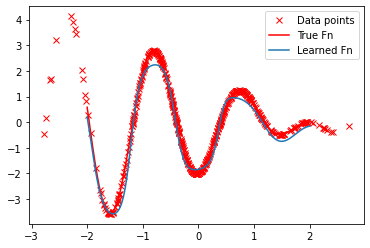

In [ ]:
with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx,f_true(xx),'r',label='True Fn')
    plt.plot(xx, model(xx),label='Learned Fn')
plt.legend()
plt.show()

Problem 2

In [ ]:
X_train = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N), dtype=torch.float32)
y_train = f_true(X_train) + torch.normal(0,0.5,X_train.shape)

In [ ]:
model = MLP()

model.linear.weight.data = torch.normal(0,1,model.linear.weight.shape)
model.linear.bias.data = torch.full(model.linear.bias.shape,0.03)
model.linear2.weight.data = torch.normal(0,1,model.linear2.weight.shape)
model.linear2.bias.data = torch.full(model.linear.bias.shape,0.03)
model.linear3.weight.data = torch.normal(0,1,model.linear3.weight.shape)
model.linear3.bias.data = torch.full(model.linear3.bias.shape,0.03)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

# train_loader = DataLoader(dataset=(X_train,y_train), batch_size=B, shuffle=True)
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B)

for epoch in range(K) :
    for x, y in train_dataloader:
        optimizer.zero_grad()
        train_loss = loss_function(model(x), y)
        train_loss.backward()
        optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


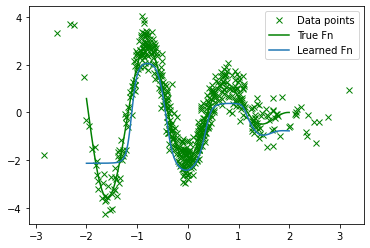

In [ ]:
with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'gx',label='Data points')
    plt.plot(xx,f_true(xx),'g',label='True Fn')
    plt.plot(xx, model(xx),label='Learned Fn')
plt.legend()
plt.show()